# Bestimmung des Hintergrundes einer Satellitenszene aus den Daten der letzten 30 Tage

Ein interessanter Ansatz, um Wolken und Hintergrund zu unterscheiden ist es den Hintergrund statistisch zu bestimmen. Dafür geht man wie folgt vor:

1. Einen gewünschten Zeitpunkt auswählen.
2. Alle Daten des gleichen Zeitpunktes der letzten 30 Tage betrachten
3. Das Minimum der Daten für jeden Pixel bestimmen (HRV) oder das Maximum (IR).
4. Die sich ergebende Karte ist der Hintergrund.

In [100]:
import numpy as np
import datetime as dt
import pandas as pd

import load_satellite_data as lsd
from analysis_tools import make_hrv_upscaling as mhu

from scipy import ndimage as ndi

import fixed_colourbar as fc
from plotting_tools.colormaps import enhanced_colormap
emap = enhanced_colormap(vmin=210,vmed=240,vmax=300)

# 1 Zeitpunkt auswählen


In [15]:
t = dt.datetime(2013,6,20,12,0)

In [16]:
start = t - dt.timedelta(days=31)
print(start)

2013-05-20 12:00:00


In [17]:
end = t - dt.timedelta(days=1)
print(end)

2013-06-19 12:00:00


In [18]:
dates = pd.date_range(start=start.strftime("%Y%m%dt%H%M"),end=t.strftime("%Y%m%dt%H%M"),freq="1d")

In [19]:
dates

DatetimeIndex(['2013-05-20 12:00:00', '2013-05-21 12:00:00',
               '2013-05-22 12:00:00', '2013-05-23 12:00:00',
               '2013-05-24 12:00:00', '2013-05-25 12:00:00',
               '2013-05-26 12:00:00', '2013-05-27 12:00:00',
               '2013-05-28 12:00:00', '2013-05-29 12:00:00',
               '2013-05-30 12:00:00', '2013-05-31 12:00:00',
               '2013-06-01 12:00:00', '2013-06-02 12:00:00',
               '2013-06-03 12:00:00', '2013-06-04 12:00:00',
               '2013-06-05 12:00:00', '2013-06-06 12:00:00',
               '2013-06-07 12:00:00', '2013-06-08 12:00:00',
               '2013-06-09 12:00:00', '2013-06-10 12:00:00',
               '2013-06-11 12:00:00', '2013-06-12 12:00:00',
               '2013-06-13 12:00:00', '2013-06-14 12:00:00',
               '2013-06-15 12:00:00', '2013-06-16 12:00:00',
               '2013-06-17 12:00:00', '2013-06-18 12:00:00',
               '2013-06-19 12:00:00', '2013-06-20 12:00:00'],
              dtype='da

## 2 HRV Daten der letzten 30 Tage für denselben Zeitpunkt laden

In [147]:
sat_data = []

for d in dates:
    sd = lsd.load_satellite_data(d,'HRV',region='de')
    
    if sd.shape == (720,1200):
        sat_data.append(sd)

Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
ERROR:  /vols/altair/datasets/eumcst//msevi_rss/l15_hdf/eu/2013/05/31/msg?-sevi-20130531t1200z-l15hdf-rss-eu.c2.h5  does not exist!
... reading  /tmp/hrit4426205077/H-000-MSG2__-MSG2_RSS____-HRV______-000022___-201305311200-__
... reading  /tmp/hrit4426205077/H-000-MSG2__-MSG2_RSS____-HRV______-000023___-201305311200-__

Combine segments

Do calibration
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Regi

## 3 Das Minimum aus allen Zeitschritten für jeden Pixel bestimmen

In [25]:
sat_data = np.array(sat_data)

In [26]:
mins = np.min(sat_data,axis=0)

## 4 Ergebnis: Wolkenfreier Hintergrund

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'HRV-Hintergrund, bestimmt als das Minimum\nder HRV-Bilder der letzten 30 Tage zur selben Uhrzeit')

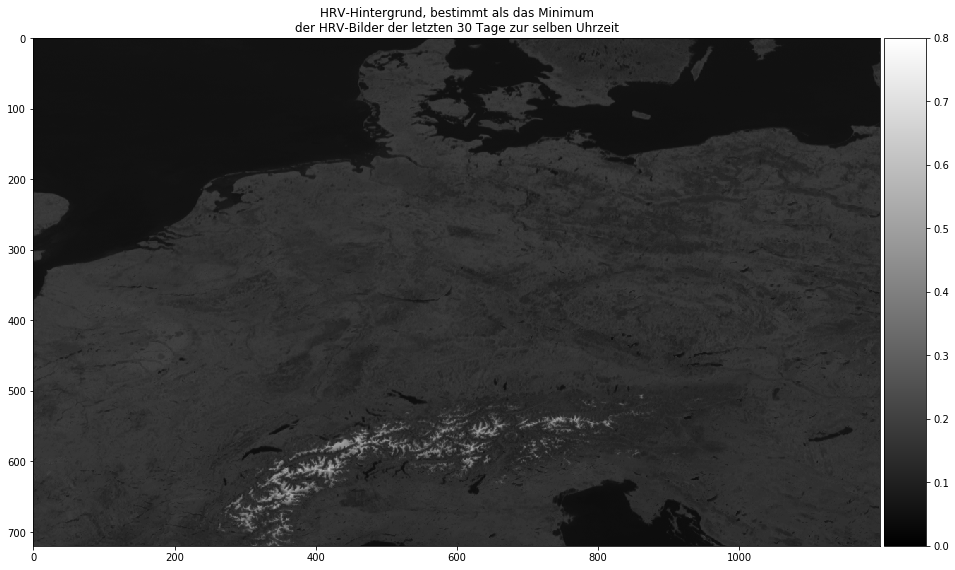

In [144]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(mins,vmin=0,vmax=0.8,cmap='gray')
fc.colourbar(p0)
ax.set_title("HRV-Hintergrund, bestimmt als das Minimum\nder HRV-Bilder der letzten 30 Tage zur selben Uhrzeit")

Text(0.5, 1.0, 'HRV-Deutschlandausschnitt, 20.06.2013 12:00 UTC')

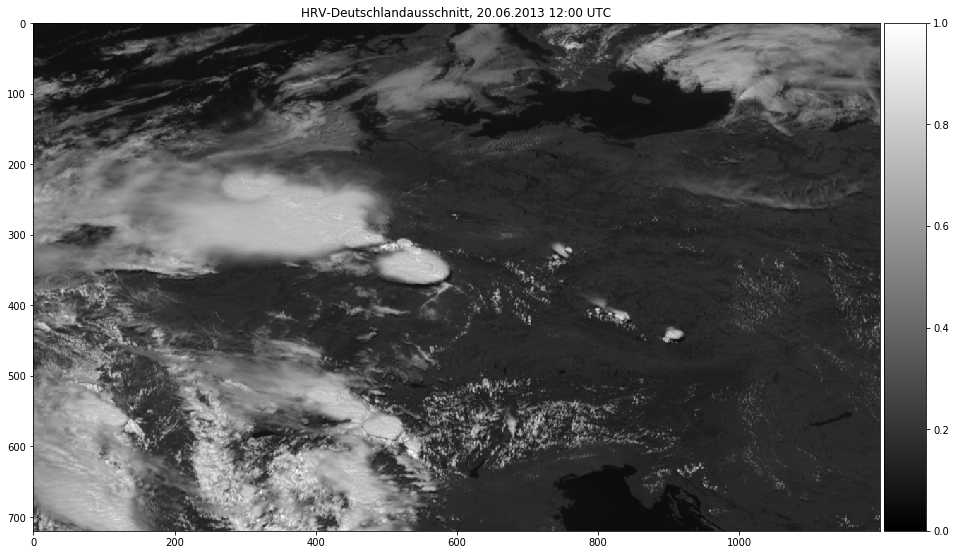

In [146]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(sat_data[-1],vmin=0,vmax=1,cmap='gray')
fc.colourbar(p0)
ax.set_title("HRV-Deutschlandausschnitt, {}".format(t.strftime("%d.%m.%Y %H:%M UTC")))

Text(0.5, 1.0, 'Differenz von aktuellem HRV-Bild und\ndem statistisch aus den letzten 30 Tagen bestimmten Hintergrund')

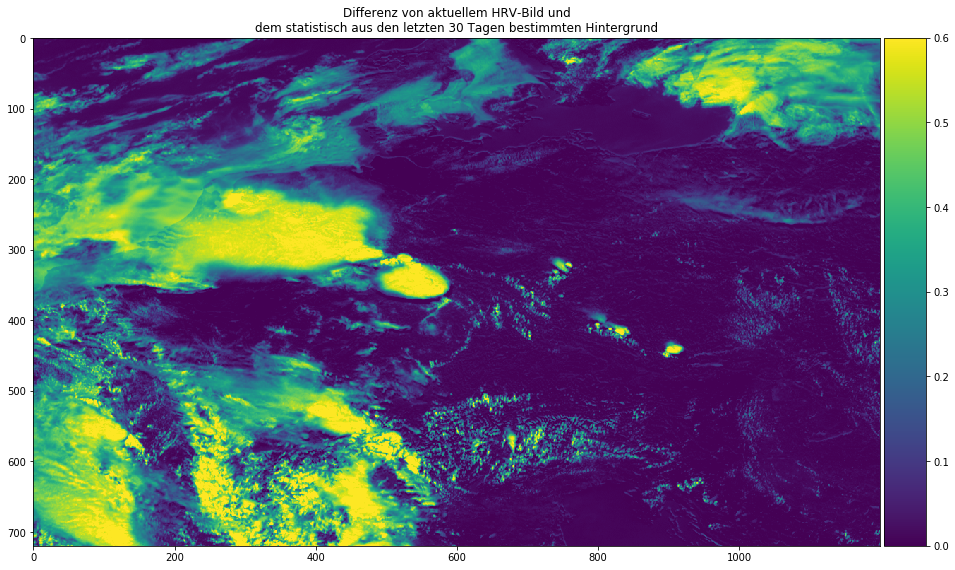

In [148]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(sat_data[-1] - mins,vmin=0,vmax=0.6)
fc.colourbar(p0)
ax.set_title("Differenz von aktuellem HRV-Bild und\ndem statistisch aus den letzten 30 Tagen bestimmten Hintergrund")

Die Differenz sollte gegen Null gehen, wo keine Wolken vorhanden sind und größer als Null sein, wo sie vorhanden sind. Das funktioniert auch im großen und ganzen sehr gut, nur die Küstenlinien stechen mit einer höheren Differenz hervor. Vielleicht ist die Ursache dafür Unterschiede in der Illumination durch die Sonne an diesem Tag. Um einen Teil der Küstenabschnitte mit auszumaskieren, sollten wir als Schwellwert für die Unterscheidung von Wolken und wolkenfreien Bereichen einen höheren Wert als Null nehmen.

In [126]:
clouds = np.ma.masked_where(sat_data[-1] - mins<np.percentile(sat_data[-1] - mins,50),sat_data[-1])

Text(0.5, 1.0, 'Wolkige Bereiche im HRV-Kanal')

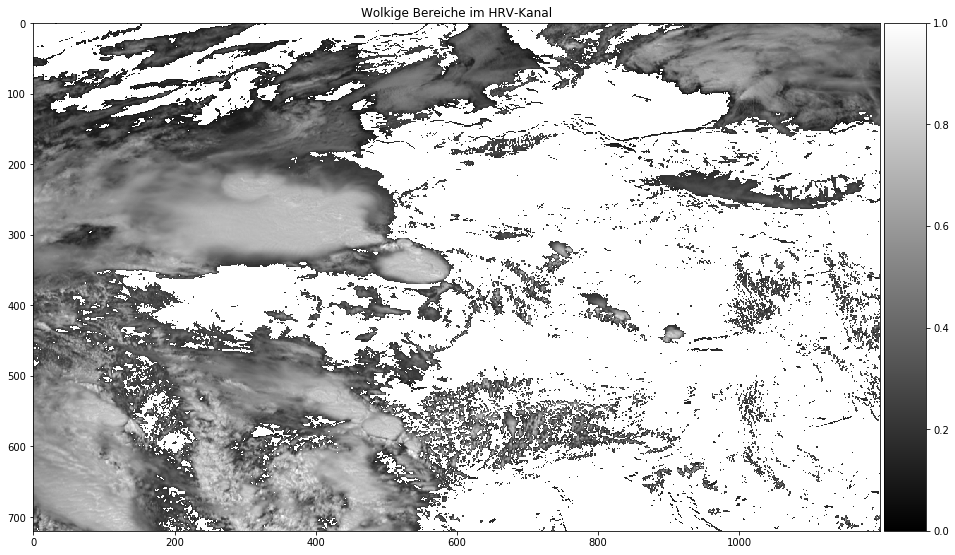

In [127]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(clouds,vmin=0,vmax=1,cmap='gray')
fc.colourbar(p0)
ax.set_title("Wolkige Bereiche im HRV-Kanal")

Das sieht soweit vernünftig aus. Teilweise werden Küstenlininen nicht mit ausmaskiert, aber ansonsten bekommen wir alle wolkigen Bereiche.

Als nächstes adaptieren wir die Maske für die Standard-SEVIRI-Auflösung und probieren das mal für den IR-10,8-µm-Kanal.

In [128]:
mask = ~clouds.mask*1

In [129]:
background_std_res = mask[::3,::3]

Text(0.5, 1.0, 'Wolkenmaske auf Standardauflösung')

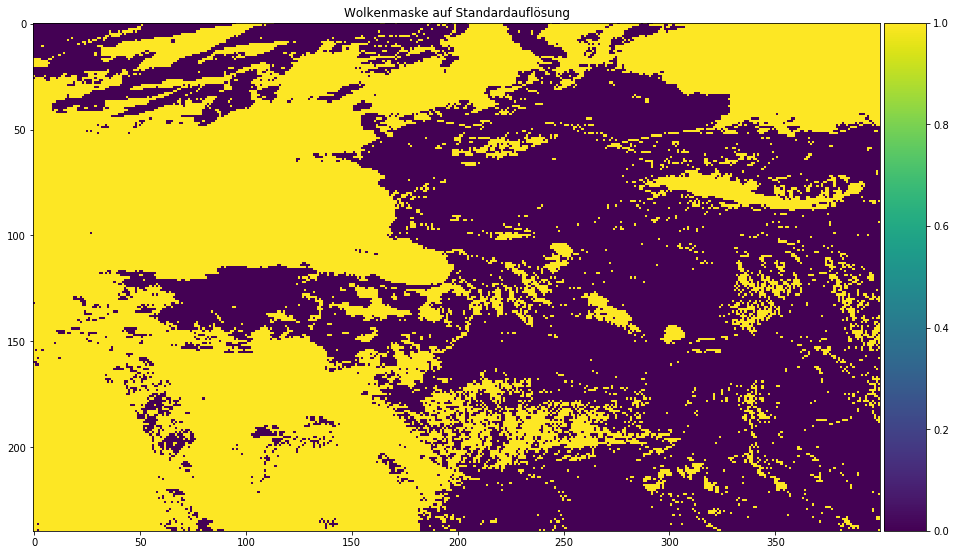

In [130]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(background_std_res)
fc.colourbar(p0)
ax.set_title("Wolkenmaske auf Standardauflösung")

In [131]:
ir108 = lsd.load_satellite_data(t, 'IR_108',region='de')

Region suggests use of hdf file


In [132]:
ir_clouds = np.ma.masked_where(background_std_res==0,ir108.copy())

Text(0.5, 1.0, 'IR 10,8 µm - Kanal')

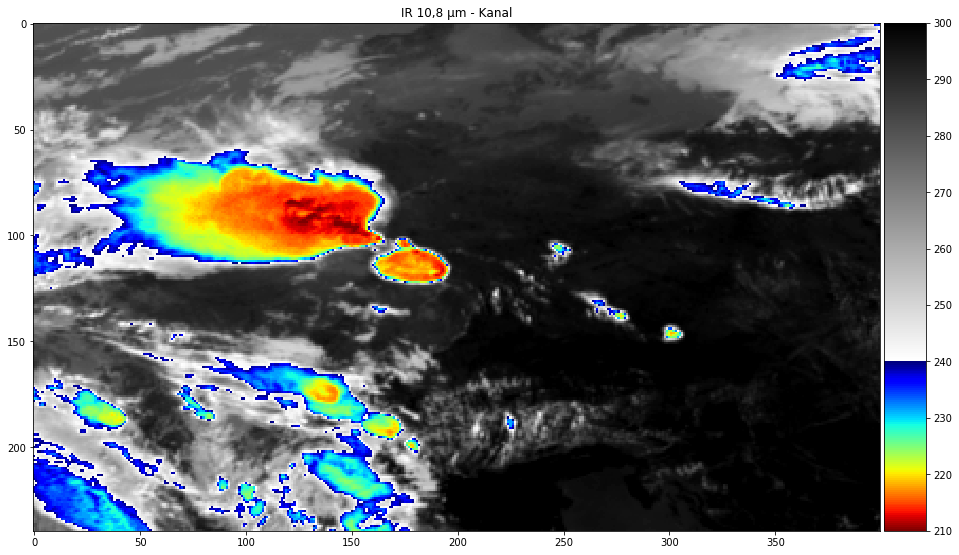

In [133]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(ir108,vmin=210,vmax=300,cmap=emap)
fc.colourbar(p0)
ax.set_title("IR 10,8 µm - Kanal")

Text(0.5, 1.0, 'Wolkige Bereiche, IR 10,8 µm - Kanal')

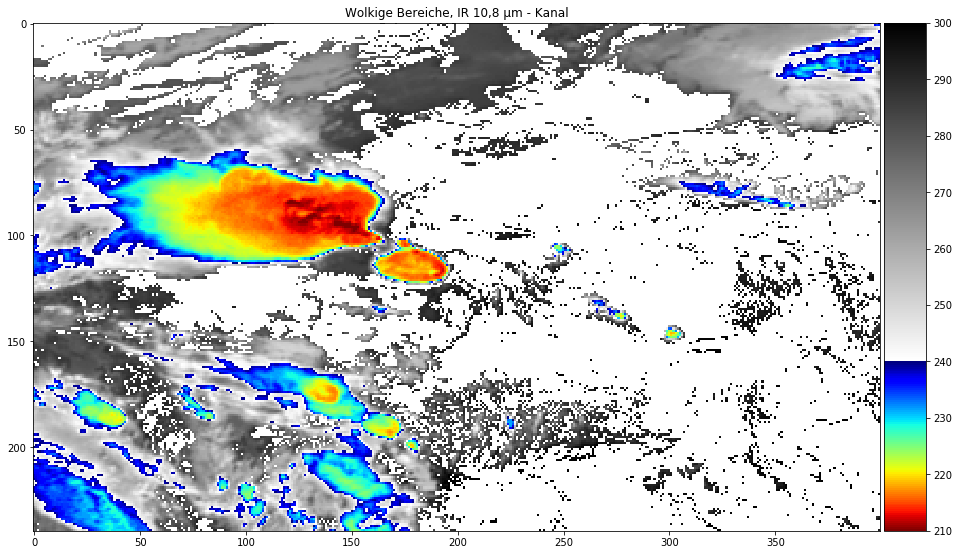

In [134]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
p0 = ax.imshow(ir_clouds,vmin=210,vmax=300,cmap=emap)
fc.colourbar(p0)
ax.set_title("Wolkige Bereiche, IR 10,8 µm - Kanal")

Das sieht soweit vernünftig aus. Es gehen Anteile der dünnen Wolken verloren, aber ansonsten bekommen wir alle Wolken.

In [135]:
def background_from_hrv(time_step,region='eu'):
    import load_satellite_data as lsd
    import pandas as pd
    import MSGtools as mst
    from analysis_tools import make_hrv_upscaling as mhu
    import l15_msevi.msevi as msv
    
    # Regionskonfiguration
    regions = {'eu':(1800,2400),
               'de':{720,1200}}
    
    # erstelle Liste mit Zeitschritten
    start_time = time_step - dt.timedelta(days=31)
    end_time = time_step - dt.timedelta(days=1)
     
    dates = pd.date_range(start = start_time.strftime("%Y%m%dt%H%M"),
                          end = end_time.strftime("%Y%m%dt%H%M"),
                          freq="1d")
  
    # lade HRV-Daten
    hrv_data = []

    for d in dates:
        sd = lsd.load_satellite_data(d.to_pydatetime(),'HRV',region=region)
        
        # wenn HRIT-Daten gelanden werden ist der Ausschnitt nicht der gleiche wie bei hdf-Daten, deshalb prüfen,
        # denn ansonsten kann das Minimum nicht berechnet werden
        if sd.shape == regions[region]:
            hrv_data.append(sd)        
    
    hrv_data = np.array(hrv_data)
    
    # Berechne zeitliches Minimum als Hintergrund
    background = np.min(hrv_data,axis=0)
    
    return background